## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow
from warnings import filterwarnings
filterwarnings("ignore")

## Getting the current working directory

In [2]:
import os
os.getcwd()

'D:\\ML DL AI DSBDA\\Pneumonia Detection using X-Ray images'

## Changing the working directory for image path reading

In [3]:
from pathlib import Path

In [4]:
print("Changed the working directory to: ")
%cd "D:\\ML DL AI DSBDA\\Pneumonia Detection using X-Ray images\\chest_xray"

Changed the working directory to: 
D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray


## Accessing the images through the paths

In [5]:
normal_images_path = Path(r"D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray\train\NORMAL")
pneumonia_images_path = Path(r"D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray\train\PNEUMONIA")

In [6]:
import os
print("Images from the normal X-Ray folder: ")
for i in range(0, 5):
    a = os.listdir(normal_images_path)[i]
    print(a)

Images from the normal X-Ray folder: 
IM-0115-0001.jpeg
IM-0117-0001.jpeg
IM-0119-0001.jpeg
IM-0122-0001.jpeg
IM-0125-0001.jpeg


In [7]:
print("Images from the Pneumonia X-Ray folder: ")
for i in range(0, 5):
    a = os.listdir(normal_images_path)[i]
    print(a)

Images from the Pneumonia X-Ray folder: 
IM-0115-0001.jpeg
IM-0117-0001.jpeg
IM-0119-0001.jpeg
IM-0122-0001.jpeg
IM-0125-0001.jpeg


## Reading and displaying the images

In [8]:
from imutils import paths

In [9]:
normal_images = list(paths.list_images(normal_images_path))
pneumonia_images = list(paths.list_images(pneumonia_images_path))

In [10]:
n_path = pd.Series(normal_images, name = 'normal_images')
p_path = pd.Series(pneumonia_images, name = 'pneumonia_images')

In [11]:
data = pd.DataFrame({
    "Normal_Images":n_path,
    "Pneumonia_Images":p_path
})

In [12]:
data.head()

,Normal_Images,Pneumonia_Images
0,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
1,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
2,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
3,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
4,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...


In [13]:
import cv2

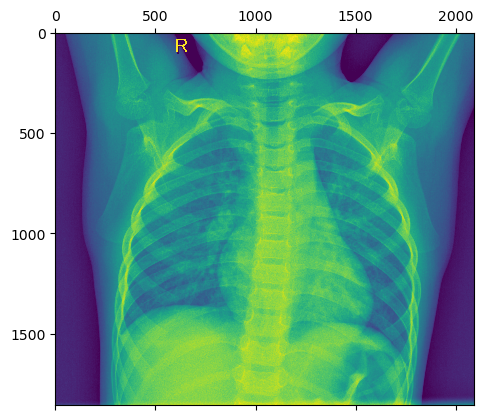

In [14]:
normal_img = cv2.imread(str(data.Normal_Images[0]), 0)
plt.matshow(normal_img)    

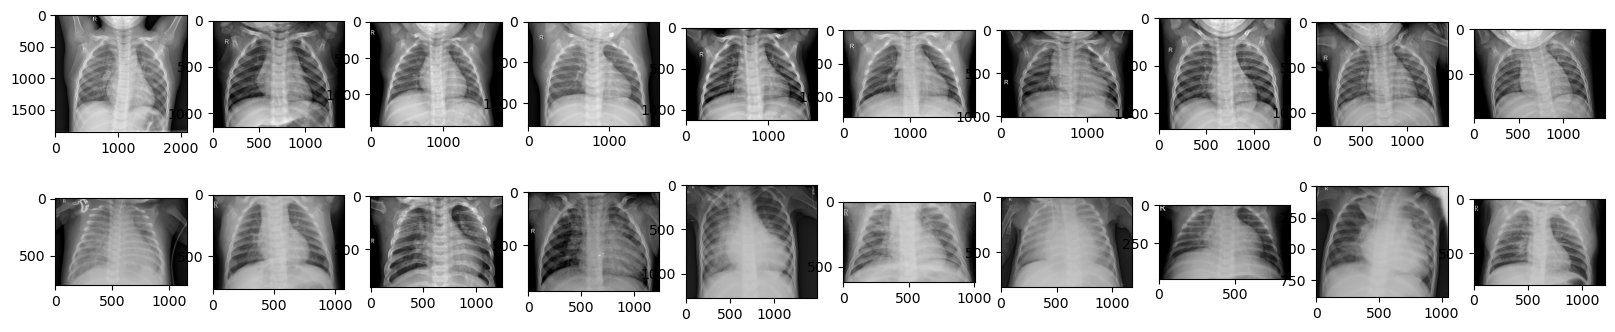

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(cv2.imread(str(data.Normal_Images[i])))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cv2.imread(str(data.Pneumonia_Images[i])))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()


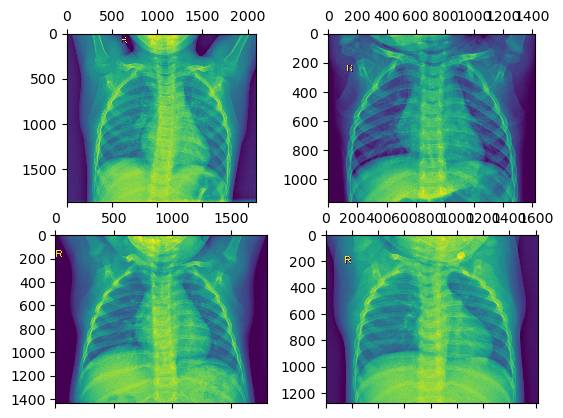

In [16]:
fig, ax = plt.subplots(2,2)
ax[0,0].matshow(cv2.imread(str(data.Normal_Images[0]), 0))
ax[0,1].matshow(cv2.imread(str(data.Normal_Images[1]), 0))
ax[1,0].matshow(cv2.imread(str(data.Normal_Images[2]), 0))
ax[1,1].matshow(cv2.imread(str(data.Normal_Images[3]), 0))

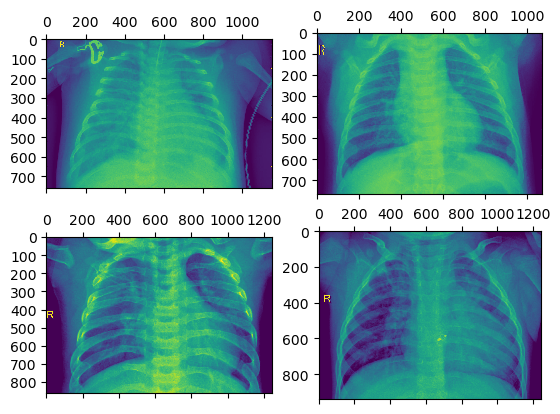

In [17]:
fig, ax = plt.subplots(2,2)
ax[0,0].matshow(cv2.imread(str(data.Pneumonia_Images[0]), 0))
ax[0,1].matshow(cv2.imread(str(data.Pneumonia_Images[1]), 0))
ax[1,0].matshow(cv2.imread(str(data.Pneumonia_Images[2]), 0))
ax[1,1].matshow(cv2.imread(str(data.Pneumonia_Images[3]), 0))

## Defining the model architectrure

### There are two approaches used for this task
#### > Transfer learning using a pretrained model
#### > Defining our own model

In [18]:
# Create a model
from keras import layers, callbacks, utils, applications, optimizers
from keras.layers import Dense, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, Flatten
from keras.models import Sequential, Model, load_model
pretrained_model = keras.applications.EfficientNetB0(input_shape = (96,96,3), include_top = False)
model = Sequential([
    pretrained_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(1)    
])
model.build(input_shape=(None,96,96,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 3, 3, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [20]:
train_data_dir = r"D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//train//"
test_data_dir = r"D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//"
validation_data_dir = r"D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//val//"

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rotation_range=0.2, width_shift_range=0.1, shear_range=0.1, zoom_range=0.1)
train = image_generator.flow_from_directory(train_data_dir, batch_size=8, shuffle=True, class_mode='binary', target_size=(416,416))
val_datagen = ImageDataGenerator(rescale=1/255.)
validation = val_datagen.flow_from_directory(validation_data_dir, batch_size=1, shuffle=False, class_mode='binary',target_size=(416,416))
test = val_datagen.flow_from_directory(test_data_dir, batch_size=1, shuffle=False, class_mode='binary', target_size=(416,416))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [23]:
import time

In [24]:
start_time = time.time()
history = model.fit(
    train, 
    epochs = 10,
    validation_data = validation,    
)

end_time = time.time()

training_time = end_time - start_time
print("{} is the total time required to train the model using EfficeintNet50 algorithm: ".format(training_time))

Epoch 1/10
100/100 [==============================] - 824s 8s/step - loss: 3.9799 - accuracy: 0.6725 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 737s 7s/step - loss: 2.1007 - accuracy: 0.8462 - val_loss: 1.1225 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 896s 9s/step - loss: 1.9253 - accuracy: 0.8537 - val_loss: 0.7856 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 716s 7s/step - loss: 1.7555 - accuracy: 0.8587 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 572s 6s/step - loss: 1.1267 - accuracy: 0.9025 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
100/100 [==============================] - 536s 5s/step - loss: 1.3648 - accuracy: 0.8888 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 543s 5s/step - loss: 2.6099 - accuracy: 0.8175 - val_loss: 7.6246 - val_accuracy: 0.5000

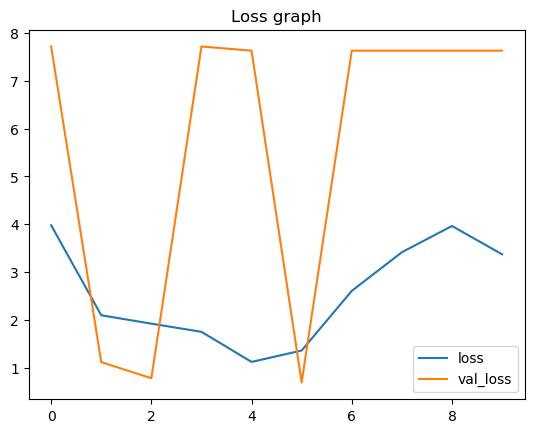

In [25]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title("Loss graph")
plt.show()

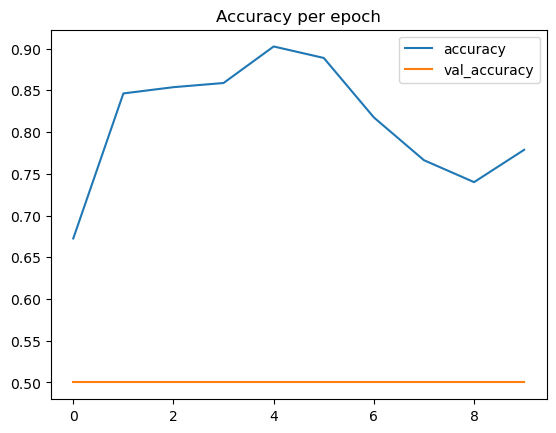

In [26]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title("Accuracy per epoch")
plt.show()

In [27]:
accuracy = model.predict(test)

624/624 [==============================] - 112s 176ms/step


In [28]:
print(accuracy[0:5])

[[12.449809]
 [12.46796 ]
 [12.447089]
 [12.307612]
 [12.450877]]


In [66]:
model.save("D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//Trained Models//efficientnet.h5")

In [29]:
im = test    # Get iterator
images = next(im)      # Get images
images[0].shape

(1, 416, 416, 3)

In [30]:
pretrained_model_2 = keras.applications.InceptionV3(input_shape = (96,96,3), include_top = False)
model_2 = Sequential([
    pretrained_model_2,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(1)    
])
model_2.build(input_shape=(None,96,96,3))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 21,770,401
Non-trainable params: 34,432
_________________________________________________________________


In [31]:
model_2.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mae', 'accuracy']
)

In [33]:
start_time = time.time()

inception_model = model_2.fit(
    train, 
    epochs = 10,
    validation_data = validation,    
    steps_per_epoch = 100,
    validation_steps = 16
)

end_time = time.time()

training_time = end_time - start_time
print("{} is the total time required to train the model using InceptionV3 algorithm: ".format(training_time))

Epoch 1/10
100/100 [==============================] - 726s 7s/step - loss: 0.3005 - mae: 0.3005 - accuracy: 0.8163 - val_loss: 0.6920 - val_mae: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 721s 7s/step - loss: 0.2372 - mae: 0.2372 - accuracy: 0.8550 - val_loss: 0.5000 - val_mae: 0.5000 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 12414s 125s/step - loss: 0.2096 - mae: 0.2096 - accuracy: 0.8775 - val_loss: 0.4999 - val_mae: 0.4999 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 751s 8s/step - loss: 0.2429 - mae: 0.2429 - accuracy: 0.8413 - val_loss: 0.6618 - val_mae: 0.6618 - val_accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 719s 7s/step - loss: 0.2390 - mae: 0.2390 - accuracy: 0.8525 - val_loss: 0.7221 - val_mae: 0.7221 - val_accuracy: 0.5000
Epoch 6/10
100/100 [==============================] - 735s 7s/step - loss: 0.2608 - mae: 0.2608 - accuracy: 0.8062 - val_

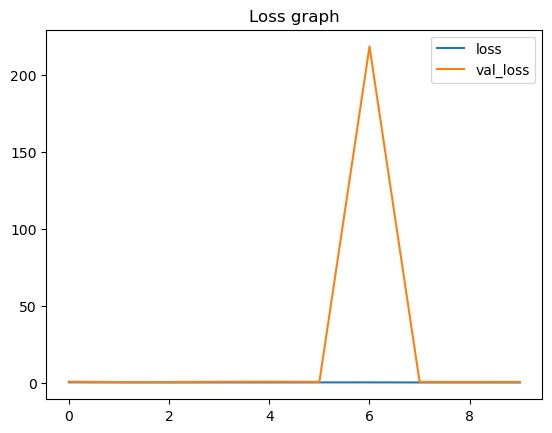

In [61]:
plt.plot(inception_model.history['loss'], label = 'loss')
plt.plot(inception_model.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title("Loss graph")
plt.show()

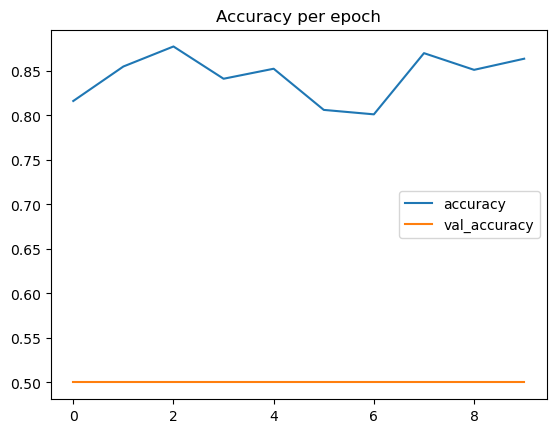

In [62]:
plt.plot(inception_model.history['accuracy'], label = 'accuracy')
plt.plot(inception_model.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title("Accuracy per epoch")
plt.show()

In [67]:
model_2.save("D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//Trained Models//inception.h5")

In [58]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [68]:
# Load the MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the fine-tuned model
mobile_netV2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
mobile_netV2.compile(optimizer = Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


start_time = time.time()
# Train the model on your pneumonia detection dataset
mobile_netV2.fit(
    train, 
    epochs = 10,
    validation_data = validation,    
    steps_per_epoch = 100,
    validation_steps = 16,
    batch_size=32
)

end_time = time.time()

training_time = end_time - start_time
print("{} is the total time required to train the model using InceptionV3 algorithm: ".format(training_time))



Epoch 1/10
100/100 [==============================] - 89s 867ms/step - loss: 0.4011 - accuracy: 0.8375 - val_loss: 1.3051 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 87s 869ms/step - loss: 0.1929 - accuracy: 0.9175 - val_loss: 1.6497 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 89s 881ms/step - loss: 0.1846 - accuracy: 0.9250 - val_loss: 1.4492 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 91s 908ms/step - loss: 0.1479 - accuracy: 0.9413 - val_loss: 1.7947 - val_accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 90s 895ms/step - loss: 0.1457 - accuracy: 0.9413 - val_loss: 0.5289 - val_accuracy: 0.7500
Epoch 6/10
100/100 [==============================] - 85s 847ms/step - loss: 0.1702 - accuracy: 0.9400 - val_loss: 0.9253 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 86s 854ms/step - loss: 0.1178 - accuracy: 0.9613 - val_loss: 0.5525 - val_ac

In [69]:
mobile_netV2.save("D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//Trained Models//mobilenet.h5")

In [88]:
normal_path_dir = 'D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//NORMAL//IM-0001-0001.jpeg'
pneu_path_dir = 'D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//PNEUMONIA//person100_bacteria_475.jpeg'

In [99]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//Trained Models//mobilenet.h5")

# Define the class labels
class_labels = ['Normal', 'Pneumonia']

# Define the paths to the X-ray images
image_paths = [
    normal_path_dir,
    pneu_path_dir,
]

# Load and preprocess the images for prediction
images = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to match the input size of the model
    img = img / 224.0  # Normalize the image
    images.append(img)

# Convert the list of images to a numpy array
images = np.array(images)

# Perform predictions
predictions = model.predict(images)

# Process the predictions
for i, prediction in enumerate(predictions):
    class_index = np.argmax(prediction)
    class_label = class_labels[class_index]
    confidence = prediction[class_index]
    
    print(f"Image: {image_paths[i]}")
    print(f"Prediction: {class_label} (Confidence: {confidence:.4f})")
    print()


1/1 [==============================] - 1s 691ms/step
Image: D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//NORMAL//IM-0001-0001.jpeg
Prediction: Normal (Confidence: 0.9968)

Image: D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//PNEUMONIA//person100_bacteria_475.jpeg
Prediction: Normal (Confidence: 0.2499)



In [89]:
%cd "D:\\ML DL AI DSBDA\\Pneumonia Detection using X-Ray images\\chest_xray\\test"

D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray\test


In [98]:
# Load the trained model
model = load_model("D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//Trained Models//inception.h5")

# Define the class labels
class_labels = ['Normal', 'Pneumonia']

# Define the paths to the X-ray images
image_paths = [
    normal_path_dir,
    pneu_path_dir,
]

# Load and preprocess the images for prediction
images = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (96, 96))  # Resize the image to match the input size of the model
    img = img / 96.0  # Normalize the image
    images.append(img)

# Convert the list of images to a numpy array
images = np.array(images)

# Perform predictions
predictions = model.predict(images)

# Process the predictions
for i, prediction in enumerate(predictions):
    class_index = np.argmax(prediction)
    class_label = class_labels[class_index]
    confidence = prediction[class_index]
    
    print(f"Image: {image_paths[i]}")
    print(f"Prediction: {class_label} (Confidence: {confidence:.4f})")
    print()


1/1 [==============================] - 1s 1s/step
Image: D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//NORMAL//IM-0001-0001.jpeg
Prediction: Normal (Confidence: 0.7495)

Image: D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//PNEUMONIA//person100_bacteria_475.jpeg
Prediction: Normal (Confidence: 0.7495)

